copied from: https://linuxize.com/post/python-delete-files-and-directories/

In [0]:
import os
os.getcwd()

In [0]:
# 디렉토리와 파일이 이미 있다면
import shutil

dir_path = './generated'

try:
    shutil.rmtree(dir_path)
except OSError as e:
    print("Error: %s : %s" % (dir_path, e.strerror))

copied from: https://rubikscode.net/2018/12/17/implementing-gan-dcgan-with-python/

In [0]:
import os
os.mkdir('/content/drive/My Drive/Colab Notebooks/generated')

In [0]:
!cd '/content/drive/My Drive/Colab Notebooks'

In [0]:
# image_helper.py

import os
import numpy as np
import imageio
import matplotlib.pyplot as plt

class ImageHelper(object):
    def save_image(self, generated, epoch, directory):
        fig, axs = plt.subplots(5, 5)
        count = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(generated[count, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                count += 1
        fig.savefig("{}/{}.png".format(directory, epoch))
        plt.close()
        
    def makegif(self, directory):
        filenames = np.sort(os.listdir(directory))
        filenames = [ fnm for fnm in filenames if ".png" in fnm]
    
        with imageio.get_writer(directory + 'image.gif', mode='I') as writer:
            for filename in filenames:
                image = imageio.imread(directory + filename)
                writer.append_data(image)

In [0]:
# gan.py

from __future__ import print_function, division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Keras modules
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

class GAN():
    def __init__(self, image_shape, generator_input_dim, image_hepler):
        optimizer = Adam(0.0002, 0.5)
        
        self._image_helper = image_hepler
        self.img_shape = image_shape
        self.generator_input_dim = generator_input_dim

        # Build models
        self._build_generator_model()
        self._build_and_compile_discriminator_model(optimizer)
        self._build_and_compile_gan(optimizer)

    def train(self, epochs, train_data, batch_size):
        
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        history = []
        for epoch in range(epochs):
            #  Train Discriminator
            batch_indexes = np.random.randint(0, train_data.shape[0], batch_size)
            batch = train_data[batch_indexes]
            genenerated = self._predict_noise(batch_size)
            loss_real = self.discriminator_model.train_on_batch(batch, real)
            loss_fake = self.discriminator_model.train_on_batch(genenerated, fake)
            discriminator_loss = 0.5 * np.add(loss_real, loss_fake)

            #  Train Generator
            noise = np.random.normal(0, 1, (batch_size, self.generator_input_dim))
            generator_loss = self.gan.train_on_batch(noise, real)

            # Plot the progress
            print ("---------------------------------------------------------")
            print ("******************Epoch {}***************************".format(epoch))
            print ("Discriminator loss: {}".format(discriminator_loss[0]))
            print ("Generator loss: {}".format(generator_loss))
            print ("---------------------------------------------------------")
            
            history.append({"D":discriminator_loss[0],"G":generator_loss})
            
            # Save images from every hundereth epoch generated images
            if epoch % 100 == 0:
                self._save_images(epoch)
                
        self._plot_loss(history)
        self._image_helper.makegif("/content/drive/My Drive/Colab Notebooks/generated/")        
    
    def _build_generator_model(self):
        generator_input = Input(shape=(self.generator_input_dim,))
        generator_seqence = Sequential(
                [Dense(256, input_dim=self.generator_input_dim),
                 LeakyReLU(alpha=0.2),
                 BatchNormalization(momentum=0.8),
                 Dense(512),
                 LeakyReLU(alpha=0.2),
                 BatchNormalization(momentum=0.8),
                 Dense(1024),
                 LeakyReLU(alpha=0.2),
                 BatchNormalization(momentum=0.8),
                 Dense(np.prod(self.img_shape), activation='tanh'),
                 Reshape(self.img_shape)])
    
        generator_output_tensor = generator_seqence(generator_input)       
        self.generator_model = Model(generator_input, generator_output_tensor)
        
    def _build_and_compile_discriminator_model(self, optimizer):
        discriminator_input = Input(shape=self.img_shape)
        discriminator_sequence = Sequential(
                [Flatten(input_shape=self.img_shape),
                 Dense(512),
                 LeakyReLU(alpha=0.2),
                 Dense(256),
                 LeakyReLU(alpha=0.2),
                 Dense(1, activation='sigmoid')])
    
        discriminator_tensor = discriminator_sequence(discriminator_input)
        self.discriminator_model = Model(discriminator_input, discriminator_tensor)
        self.discriminator_model.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        self.discriminator_model.trainable = False
    
    def _build_and_compile_gan(self, optimizer):
        real_input = Input(shape=(self.generator_input_dim,))
        generator_output = self.generator_model(real_input)
        discriminator_output = self.discriminator_model(generator_output)        
        
        self.gan = Model(real_input, discriminator_output)
        self.gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    def _save_images(self, epoch):
        generated = self._predict_noise(25)
        generated = 0.5 * generated + 0.5
        self._image_helper.save_image(generated, epoch, "/content/drive/My Drive/Colab Notebooks/generated")
    
    def _predict_noise(self, size):
        noise = np.random.normal(0, 1, (size, self.generator_input_dim))
        return self.generator_model.predict(noise)
        
    def _plot_loss(self, history):
        hist = pd.DataFrame(history)
        plt.figure(figsize=(20,5))
        for colnm in hist.columns:
            plt.plot(hist[colnm],label=colnm)
        plt.legend()
        plt.ylabel("loss")
        plt.xlabel("epochs")
        plt.show()

In [0]:
def _build_generator_model(self):
        generator_input = Input(shape=(self.generator_input_dim,))
        generator_seqence = Sequential(
                [Dense(256, input_dim=self.generator_input_dim),
                 LeakyReLU(alpha=0.2),
                 BatchNormalization(momentum=0.8),
                 Dense(512),
                 LeakyReLU(alpha=0.2),
                 BatchNormalization(momentum=0.8),
                 Dense(1024),
                 LeakyReLU(alpha=0.2),
                 BatchNormalization(momentum=0.8),
                 Dense(np.prod(self.img_shape), activation='tanh'),
                 Reshape(self.img_shape)])
    
        generator_output_tensor = generator_seqence(generator_input)       
        self.generator_model = Model(generator_input, generator_output_tensor)

In [0]:
def _build_and_compile_discriminator_model(self, optimizer):
    discriminator_input = Input(shape=self.img_shape)
    discriminator_sequence = Sequential(
            [Flatten(input_shape=self.img_shape),
             Dense(512),
             LeakyReLU(alpha=0.2),
             Dense(256),
             LeakyReLU(alpha=0.2),
             Dense(1, activation='sigmoid')])

    discriminator_tensor = discriminator_sequence(discriminator_input)
    self.discriminator_model = Model(discriminator_input, discriminator_tensor)
    self.discriminator_model.compile(loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
    self.discriminator_model.trainable = False

In [0]:
def train(self, epochs, train_data, batch_size):
        
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    history = []
    for epoch in range(epochs):
        #  Train Discriminator
        batch_indexes = np.random.randint(0, train_data.shape[0], batch_size)
        batch = train_data[batch_indexes]
        genenerated = self._predict_noise(batch_size)
        loss_real = self.discriminator_model.train_on_batch(batch, real)
        loss_fake = self.discriminator_model.train_on_batch(genenerated, fake)
        discriminator_loss = 0.5 * np.add(loss_real, loss_fake)

        #  Train Generator
        noise = np.random.normal(0, 1, (batch_size, self.generator_input_dim))
        generator_loss = self.gan.train_on_batch(noise, real)

        # Plot the progress
        print ("---------------------------------------------------------")
        print ("******************Epoch {}***************************".format(epoch))
        print ("Discriminator loss: {}".format(discriminator_loss[0]))
        print ("Generator loss: {}".format(generator_loss))
        print ("---------------------------------------------------------")

        history.append({"D":discriminator_loss[0],"G":generator_loss})

        # Take a snapshot every 100th epoch
        if epoch % 100 == 0:
            self._save_images(epoch)

    self._plot_loss(history)
    self._image_helper.makegif("/content/drive/My Drive/Colab Notebooks/generated/")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
******************Epoch 9000***************************
Discriminator loss: 0.6868941485881805
Generator loss: 0.8776370286941528
---------------------------------------------------------
---------------------------------------------------------
******************Epoch 9001***************************
Discriminator loss: 0.6415218114852905
Generator loss: 0.8542087078094482
---------------------------------------------------------
---------------------------------------------------------
******************Epoch 9002***************************
Discriminator loss: 0.6431288719177246
Generator loss: 0.803514301776886
---------------------------------------------------------
---------------------------------------------------------
******************Epoch 9003***************************
Discriminator loss: 0.6274773478507996
Generator loss: 0.8382506370544434
---------------------------------------------------------
---------------------------------------

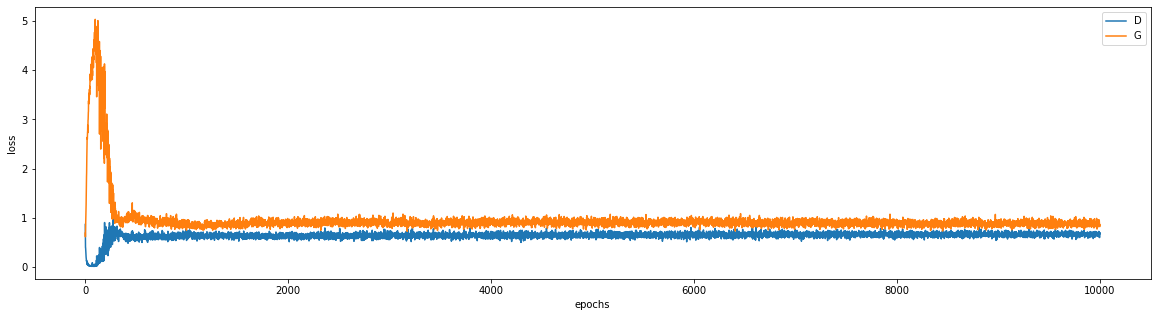

In [25]:
import numpy as np
from keras.datasets import fashion_mnist

# from image_helper import ImageHelper
# from gan import GAN

(X, _), (_, _) = fashion_mnist.load_data()
X_train = X / 127.5 - 1.
X_train = np.expand_dims(X_train, axis=3)

image_helper = ImageHelper()
generative_advarsial_network = GAN(X_train[0].shape, 100, image_helper)
generative_advarsial_network.train(10000, X_train, batch_size=32)

copied from: https://www.gatsbyjs.org/docs/working-with-gifs/

In [0]:
# 디렉토리와 파일이 이미 있다면
import shutil

dir_path = './generated-dcgan'

try:
    shutil.rmtree(dir_path)
except OSError as e:
    print("Error: %s : %s" % (dir_path, e.strerror))

In [0]:
os.mkdir('/content/drive/My Drive/Colab Notebooks/generated-dcgan')

In [0]:
# dcgan.py

from __future__ import print_function, division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Keras modules
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, Activation, ZeroPadding2D, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

class DCGAN():
    def __init__(self, image_shape, generator_input_dim, image_hepler, img_channels):
        optimizer = Adam(0.0002, 0.5)
        
        self._image_helper = image_hepler
        self.img_shape = image_shape
        self.generator_input_dim = generator_input_dim
        self.channels = img_channels

        # Build models
        self._build_generator_model()
        self._build_and_compile_discriminator_model(optimizer)
        self._build_and_compile_gan(optimizer)

    def train(self, epochs, train_data, batch_size):
        
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        history = []
        for epoch in range(epochs):
            #  Train Discriminator
            batch_indexes = np.random.randint(0, train_data.shape[0], batch_size)
            batch = train_data[batch_indexes]
            genenerated = self._predict_noise(batch_size)
            loss_real = self.discriminator_model.train_on_batch(batch, real)
            loss_fake = self.discriminator_model.train_on_batch(genenerated, fake)
            discriminator_loss = 0.5 * np.add(loss_real, loss_fake)

            #  Train Generator
            noise = np.random.normal(0, 1, (batch_size, self.generator_input_dim))
            generator_loss = self.gan.train_on_batch(noise, real)

            # Plot the progress
            print ("---------------------------------------------------------")
            print ("******************Epoch {}***************************".format(epoch))
            print ("Discriminator loss: {}".format(discriminator_loss[0]))
            print ("Generator loss: {}".format(generator_loss))
            print ("---------------------------------------------------------")
            
            history.append({"D":discriminator_loss[0],"G":generator_loss})
            
            # Save images from every hundereth epoch generated images
            if epoch % 100 == 0:
                self._save_images(epoch)
                
        self._plot_loss(history)
        self._image_helper.makegif("/content/drive/My Drive/Colab Notebooks/generated-dcgan/")        
    
    def _build_generator_model(self):
        generator_input = Input(shape=(self.generator_input_dim,))
        generator_seqence = Sequential(
                [Dense(128 * 7 * 7, activation="relu", input_dim=self.generator_input_dim),
                 Reshape((7, 7, 128)),
                 UpSampling2D(),
                 Conv2D(128, kernel_size=3, padding="same"),
                 BatchNormalization(momentum=0.8),
                 Activation("relu"),
                 UpSampling2D(),
                 Conv2D(64, kernel_size=3, padding="same"),
                 BatchNormalization(momentum=0.8),
                 Activation("relu"),
                 Conv2D(self.channels, kernel_size=3, padding="same"),
                 Activation("tanh")])
    
        generator_output_tensor = generator_seqence(generator_input)       
        self.generator_model = Model(generator_input, generator_output_tensor)
        
    def _build_and_compile_discriminator_model(self, optimizer):
        discriminator_input = Input(shape=self.img_shape)
        discriminator_sequence = Sequential(
                [Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"),
                 LeakyReLU(alpha=0.2),
                 Dropout(0.25),
                 Conv2D(64, kernel_size=3, strides=2, padding="same"),
                 ZeroPadding2D(padding=((0,1),(0,1))),
                 BatchNormalization(momentum=0.8),
                 LeakyReLU(alpha=0.2),
                 Dropout(0.25),
                 Conv2D(128, kernel_size=3, strides=2, padding="same"),
                 BatchNormalization(momentum=0.8),
                 LeakyReLU(alpha=0.2),
                 Dropout(0.25),
                 Conv2D(256, kernel_size=3, strides=2, padding="same"),
                 BatchNormalization(momentum=0.8),
                 LeakyReLU(alpha=0.2),
                 Dropout(0.25),
                 Flatten(),
                 Dense(1, activation='sigmoid')])
    
        discriminator_tensor = discriminator_sequence(discriminator_input)
        self.discriminator_model = Model(discriminator_input, discriminator_tensor)
        self.discriminator_model.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        self.discriminator_model.trainable = False
    
    def _build_and_compile_gan(self, optimizer):
        real_input = Input(shape=(self.generator_input_dim,))
        generator_output = self.generator_model(real_input)
        discriminator_output = self.discriminator_model(generator_output)        
        
        self.gan = Model(real_input, discriminator_output)
        self.gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    def _save_images(self, epoch):
        generated = self._predict_noise(25)
        generated = 0.5 * generated + 0.5
        self._image_helper.save_image(generated, epoch, "/content/drive/My Drive/Colab Notebooks/generated-dcgan")
    
    def _predict_noise(self, size):
        noise = np.random.normal(0, 1, (size, self.generator_input_dim))
        return self.generator_model.predict(noise)
        
    def _plot_loss(self, history):
        hist = pd.DataFrame(history)
        plt.figure(figsize=(20,5))
        for colnm in hist.columns:
            plt.plot(hist[colnm],label=colnm)
        plt.legend()
        plt.ylabel("loss")
        plt.xlabel("epochs")
        plt.show()

In [29]:
import numpy as np
from keras.datasets import fashion_mnist

# from image_helper import ImageHelper
# from dcgan import DCGAN


(X, _), (_, _) = fashion_mnist.load_data()
X_train = X / 127.5 - 1.
X_train = np.expand_dims(X_train, axis=3)

image_helper = ImageHelper()
generative_advarsial_network = DCGAN(X_train[0].shape, 100, image_helper, 1)
generative_advarsial_network.train(10000, X_train, batch_size=32)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
******************Epoch 2223***************************
Discriminator loss: 1.9851309843943454e-05
Generator loss: 0.024145927280187607
---------------------------------------------------------
---------------------------------------------------------
******************Epoch 2224***************************
Discriminator loss: 2.022384705924196e-05
Generator loss: 0.01900656148791313
---------------------------------------------------------
---------------------------------------------------------
******************Epoch 2225***************************
Discriminator loss: 3.645868127932772e-05
Generator loss: 0.03970366716384888
---------------------------------------------------------
---------------------------------------------------------
******************Epoch 2226***************************
Discriminator loss: 2.1486549485416617e-05
Generator loss: 0.021503563970327377
---------------------------------------------------------
------------------

KeyboardInterrupt: ignored

집에 가서 읽어볼 것:

https://heartbeat.fritz.ai/my-mangagan-building-my-first-generative-adversarial-network-2ec1920257e3


http://research.sualab.com/introduction/practice/2019/05/08/generative-adversarial-network.html

https://towardsdatascience.com/gans-vs-autoencoders-comparison-of-deep-generative-models-985cf15936ea

https://github.com/znxlwm/tensorflow-MNIST-GAN-DCGAN

- generated / generated-dcgan 생성

- fashion_mnist 샘플 생성 후 discriminator 참(1)로 입력
 - generated 와 generated 입력하여 값 도출
 - fashion-mnist가 너무 많으면 그냥 mnist(0~9까지 샘플)로 시도해 볼 것